In [1]:
#数据处理

import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


plt.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体  
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示问题`
train = pd.read_csv('data/train.csv', encoding='utf-8')
print("在训练集中，共有{}条数据，其中每条数据有{}个特征".format(train.shape[0], train.shape[1]))
test  = pd.read_csv('data/evaluation_public.csv', encoding='utf-8')
print("在测试集中，共有{}条数据，其中每条数据有{}个特征".format(test.shape[0], test.shape[1]))
df = pd.concat([train, test])

在训练集中，共有47660条数据，其中每条数据有17个特征
在测试集中，共有25710条数据，其中每条数据有16个特征


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73370 entries, 0 to 25709
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    73370 non-null  int64  
 1   user_name             67523 non-null  object 
 2   department            67523 non-null  object 
 3   ip_transform          73370 non-null  object 
 4   device_num_transform  73370 non-null  object 
 5   browser_version       73370 non-null  object 
 6   browser               73370 non-null  object 
 7   os_type               73370 non-null  object 
 8   os_version            73370 non-null  object 
 9   op_datetime           73370 non-null  object 
 10  ip_type               67523 non-null  object 
 11  http_status_code      73370 non-null  int64  
 12  op_city               73370 non-null  object 
 13  log_system_transform  67523 non-null  object 
 14  url                   73370 non-null  object 
 15  op_month           

In [3]:
#统计每类数据对应的平均风险概率
for f in ['user_name', 'department', 'ip_transform', 'device_num_transform', 'browser_version', 'browser', 'os_type', 'os_version', 'ip_type',
    'op_city', 'log_system_transform', 'url']:
    
    for v in df[f].unique():
        print(f, v, df[df[f] == v]['is_risk'].mean())
    print('*'*50)

user_name guojianping9672 0.22093023255813954
user_name yangtao1740 0.17164179104477612
user_name wangying9098 0.17916666666666667
user_name liguixiang3860 0.15656565656565657
user_name guanyu9205 0.1926605504587156
user_name wangguirong8195 0.20535714285714285
user_name yuyuzhen3194 0.14042553191489363
user_name yuanjun5870 0.20869565217391303
user_name kangwen7485 0.13478260869565217
user_name wanghongmei3888 0.1694915254237288
user_name libo2352 0.16806722689075632
user_name pengxia7510 0.20848056537102475
user_name panjun2991 0.16228070175438597
user_name jingbo3416 0.17437722419928825
user_name jiangtao2581 0.19083969465648856
user_name qiuxiuhua4938 0.18614718614718614
user_name wangchang5581 0.1891891891891892
user_name fanshulan3712 0.12435233160621761
user_name fengying9449 0.1259259259259259
user_name ranxiuzhen6780 0.14556962025316456
user_name hongchang3029 0.16333333333333333
user_name chenxiulan3024 0.18181818181818182
user_name linyulan9408 0.14285714285714285
user_name 

In [4]:
# 查询包含Nan值的行
df[df.isnull().T.any()]

,id,user_name,department,ip_transform,device_num_transform,browser_version,browser,os_type,os_version,op_datetime,ip_type,http_status_code,op_city,log_system_transform,url,op_month,is_risk
32101,32101,NaN,NaN,2UPuVp3jD,U3vZVEEyMm17,chrome_90,chrome,win,win7,2022-02-18 18:30:08,NaN,200,北京,NaN,xxx.com/loginAuth,2022-02,0.0
32102,32102,NaN,NaN,3YLGmJvFF,LyJXjnSk8YnP,edge_93,edge,win,win10,2022-03-16 13:53:20,NaN,200,成都,NaN,xxx.com/loginAuth,2022-03,0.0
32103,32103,NaN,NaN,3lOkeiuhp,8XwwfyYXx2eH,edge_93,edge,win,win10,2022-02-18 09:14:24,NaN,200,成都,NaN,xxx.com/loginAuth,2022-02,0.0
32104,32104,NaN,NaN,r0lWoWxac,XT6rv8cyHt6J,safari_13,safari,macos,macos_big_sur_11,2022-01-29 13:32:42,NaN,200,成都,NaN,xxx.com/loginAuth,2022-01,0.0
32105,32105,NaN,NaN,FswFixXl4,wqHGEaIrW5Gm,chrome_90,chrome,win,win10,2022-03-23 16:57:29,NaN,200,杭州,NaN,xxx.com/loginAuth,2022-03,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25705,25705,wangzhiqiang5883,rd,C4EfHvlZ9,GH5w6zTcZL0R,firefox_78,firefox,win,win10,2022-06-21 17:37:41,内网,200,成都,nHrKgKdJ1Mzt,xxx.com/github,2022-06,NaN
25706,25706,likun8302,accounting,kNf1ospX0,6MwEE0egsCb7,safari_13,safari,macos,macos_big_sur_11,2022-05-06 18:50:04,内网,200,深圳,2UNHLdxlhIzv,xxx.com/accounting,2022-05,NaN
25707,25707,caoyu4082,rd,R5mNQXMyn,x1EcTfUyrJbE,chrome_90,chrome,win,win7,2022-05-17 15:56:32,内网,200,成都,nHrKgKdJ1Mzt,xxx.com/github,2022-05,NaN
25708,25708,zhanglihua7105,rd,iFSM5Pvt3,8Bklz7k6AMBE,chrome_90,chrome,win,win10,2022-06-24 18:37:48,内网,200,杭州,sW0whYIx8LFM,work.xxx.com/task,2022-06,NaN


In [5]:
df.describe()

,id,http_status_code,is_risk
count,73370.000000,73370.000000,47660.000000
mean,19983.687679,211.500204,0.161477
std,13026.188573,48.997208,0.367974
min,0.000000,200.000000,0.000000
25%,9171.000000,200.000000,0.000000
50%,18342.000000,200.000000,0.000000
75%,29316.750000,200.000000,0.000000
max,47659.000000,502.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73370 entries, 0 to 25709
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    73370 non-null  int64  
 1   user_name             67523 non-null  object 
 2   department            67523 non-null  object 
 3   ip_transform          73370 non-null  object 
 4   device_num_transform  73370 non-null  object 
 5   browser_version       73370 non-null  object 
 6   browser               73370 non-null  object 
 7   os_type               73370 non-null  object 
 8   os_version            73370 non-null  object 
 9   op_datetime           73370 non-null  object 
 10  ip_type               67523 non-null  object 
 11  http_status_code      73370 non-null  int64  
 12  op_city               73370 non-null  object 
 13  log_system_transform  67523 non-null  object 
 14  url                   73370 non-null  object 
 15  op_month           

In [7]:
df['op_datetime'] = pd.to_datetime(df['op_datetime'])
df['hour'] = df['op_datetime'].dt.hour
df['weekday'] = df['op_datetime'].dt.weekday
df['year'] = df['op_datetime'].dt.year
df['month'] = df['op_datetime'].dt.month
df['day'] = df['op_datetime'].dt.day

In [8]:
#去掉不用的特征
df.drop(columns = 'op_datetime', inplace=True)
df.drop(columns = 'op_month', inplace=True)

In [9]:
#数据编码
from sklearn.preprocessing import LabelEncoder

for feat in ['user_name', 'department', 'ip_transform', 'device_num_transform', 'browser_version','log_system_transform', 'op_city','browser', 'os_type', 'os_version', 'ip_type',
     'url']:
    lab = LabelEncoder()
    df[feat] = lab.fit_transform(df[feat])

In [10]:
#填充空值
for feat in [item for item in df.columns if item != 'is_risk']:
    df[feat].fillna(df[feat].median(), inplace=True)

In [11]:
df.corr()['is_risk']

id                      0.532856
user_name              -0.002489
department              0.002607
ip_transform            0.005392
device_num_transform    0.013055
browser_version        -0.005974
browser                -0.008147
os_type                 0.010424
os_version              0.003433
ip_type                 0.013618
http_status_code        0.421246
op_city                -0.040909
log_system_transform   -0.011593
url                    -0.080734
is_risk                 1.000000
hour                   -0.112167
weekday                 0.096357
year                         NaN
month                  -0.001807
day                    -0.014016
Name: is_risk, dtype: float64

In [12]:
features = [item for item in df.columns if item != 'is_risk']
traindata = df[~df['is_risk'].isnull()].reset_index(drop=True)
testdata = df[df['is_risk'].isnull()].reset_index(drop=True)

In [13]:
data_X = traindata[features].values[:40000]
data_Y = traindata['is_risk'].values[:40000].astype(int).reshape(-1, 1)
data_X_test = traindata[features].values[40000:]
data_Y_test = traindata['is_risk'].values[40000:].astype(int).reshape(-1, 1)
testdata = testdata[features].values

In [14]:
# 归一化
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
data_X = mm.fit_transform(data_X)
data_X_test = mm.fit_transform(data_X_test)
testdata = mm.fit_transform(testdata)

In [15]:
print(data_X.shape)
print(data_X_test.shape)
print(testdata.shape)

(40000, 19)
(7660, 19)
(25710, 19)


In [16]:
#模型组网

import random
import paddle

seed = 1234
# 设置随机种子 固定结果
def set_seed(seed):
    np.random.seed(seed)
    random.seed(seed)
    paddle.seed(seed)

set_seed(seed)

import paddle
import paddle.nn as nn

# 定义动态图
class Classification(nn.Layer):
    def __init__(self):
        super(Classification, self).__init__()
        self.drop = nn.Dropout(p=0.25)
        self.fc1 = nn.Linear(19, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 2)
        self.fc4 = nn.Linear(2, 1)
        self.sig = nn.Sigmoid()
    
    # 网络的前向计算函数
    def forward(self, inputs):
        x = self.fc1(inputs)
        x = self.fc2(x)
        x = self.fc3(x) 
        x = self.drop(x)
        x = self.fc4(x)
        pred  = self.sig(x)
        return pred

In [17]:
#配置参数及训练
#记录日志


# 定义绘制训练过程的损失值变化趋势的方法draw_train_process
train_nums = []
train_costs = []
def draw_train_process(iters,train_costs):
    title="training cost"
    plt.title(title, fontsize=24)
    plt.xlabel("iter", fontsize=14)
    plt.ylabel("cost", fontsize=14)
    plt.plot(iters, train_costs,color='red',label='training cost') 
    plt.grid()
    plt.show()

/usr/local/lib/python3.8/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


start training ... 
Pass:0,Cost:0.72444
Pass:1,Cost:0.40873
Pass:2,Cost:0.34049
Pass:3,Cost:0.35272
Pass:4,Cost:0.37457
Pass:5,Cost:0.36266
Pass:6,Cost:0.34161
Pass:7,Cost:0.34834
Pass:8,Cost:0.32285


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: FangSong
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: FangSong
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: FangSong


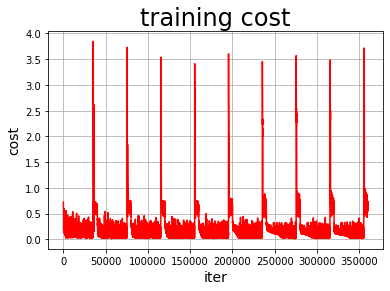

In [18]:
#模型训练

import paddle.nn.functional as F
y_preds = []
labels_list = []
BATCH_SIZE =40
train_data = data_X
train_data_y = data_Y
test_data = data_X_test
test_data_y = data_Y_test
def train(model):
    print('start training ... ')
    # 开启模型训练模式
    model.train()
    EPOCH_NUM = 9
    train_num = 0
    scheduler = paddle.optimizer.lr.CosineAnnealingDecay(learning_rate=0.0025, T_max=int(traindata.shape[0]/BATCH_SIZE*EPOCH_NUM), verbose=False)
    optimizer = paddle.optimizer.Adam(learning_rate=scheduler, parameters=model.parameters())
    #optimizer = paddle.optimizer.Adam(learning_rate=0.001, parameters=model.parameters())
    for epoch_id in range(EPOCH_NUM):
        # 在每轮迭代开始之前，将训练数据的顺序随机的打乱
        np.random.shuffle(train_data)
        # 将训练数据进行拆分，每个batch包含8条数据
        mini_batches = [np.append(train_data[k: k+BATCH_SIZE], train_data_y[k: k+BATCH_SIZE], axis = 1) for k in range(0, len(train_data), BATCH_SIZE)]
        for batch_id, data in enumerate(mini_batches):
            features_np = np.array(data[:, :19], np.float32)
            labels_np = np.array(data[:, -1:], np.float32)

            features = paddle.to_tensor(features_np)
            labels = paddle.to_tensor(labels_np)
            #前向计算
            y_pred = model(features)
            #使用二分类损失
            cost = F.binary_cross_entropy(y_pred, labels)
            train_cost = cost.numpy()
            #反向传播
            cost.backward()
            #最小化loss，更新参数
            optimizer.step()
            # 清除梯度
            optimizer.clear_grad()
            if batch_id % 1000 == 0 and epoch_id % 1 == 0:
                print("Pass:%d,Cost:%0.5f"%(epoch_id, train_cost))

            train_num = train_num + BATCH_SIZE
            train_nums.append(train_num)
            train_costs.append(train_cost)
def predict(model):
    print('start evaluating ... ')
    model.eval()
    outputs = []
    mini_batches = [np.append(test_data[k: k+BATCH_SIZE], test_data_y[k: k+BATCH_SIZE], axis = 1) for k in range(0, len(test_data), BATCH_SIZE)]
    for data in mini_batches:
        features_np = np.array(data[:, :19], np.float32)
        features = paddle.to_tensor(features_np)
        pred = model(features)
        #out = paddle.argmax(pred, axis=1)
        outputs.extend(pred.numpy())
    return outputs
model = Classification()
train(model)
draw_train_process(train_nums, train_costs)

start evaluating ... 
roc_auc_score 0.7328693332908612


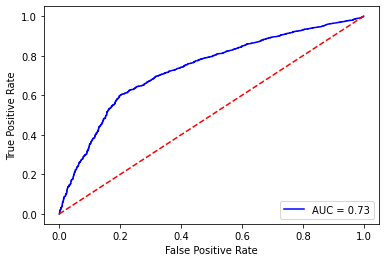

In [19]:
#模型评估

from sklearn import metrics 
from sklearn.metrics import roc_auc_score,roc_curve, auc
outputs = predict(model)
test_data_y = test_data_y.reshape(-1, )
outputs = np.array(outputs)

print('roc_auc_score', roc_auc_score(test_data_y,outputs))

fpr, tpr, threshold = roc_curve(test_data_y,outputs)   
roc_auc = auc(fpr,tpr)
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
#保存预测结果

#模型预测

predict_result=[]
for infer_feature in testdata:
    #print(infer_feature.shape)
    infer_feature = paddle.to_tensor(np.array(infer_feature, dtype='float32'))
    result = model(infer_feature)
    # print(result)
    predict_result.append(result.numpy()[0])

/usr/local/lib/python3.8/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
